Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **1 hour and 30 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Chretien Li"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Mergesort and recurrences

## Question 1 [time estimate: 20 minutes]

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2), which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations, as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.

**Note**: ```MERGE``` function is to combine two lists together, not to create a sorted list. Please check the parameters carefully to correctly identify two sub-lists you need to merge.

#index 2-4 inclusive (L), 5-7 inclusive (R)
Array: [6,7,8,1,4,6]
-> [!6,7,8] & [!1,4,6]
    - 6 vs 1
Array: [1,7,8,1,4,6]
-> [!6,7,8] & [1,!4,6]
    - 6 vs 4
Array: [1,4,8,1,4,6]
-> [!6,7,8] & [1,4,!6]
    - 6 vs 6
Array: [1,4,6,6,4,6]
-> [6,!7,!8] & [1,4,6]
    - Only left array remaining to be checked
    - Add both to end
Temp array:[1,4,6,6,7,8]


## Question 2 [time estimate: 5 minutes]
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python lists). Give your answer in prose in the cell below.

instead of iterating over original array and adding to new array, jsut create new list from as slices of original array

## Question 3 [time estimate: 20 minutes]

Write a Python implementation of the merge pseudocode (both parts). Your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A.

**Note**: Please note that the pseudocde in Cormen et. al. works with the indexing convention starting at 1; in Python we will use the customary indexing convention starting at 0.

In [55]:
def merge(A, p, q, r):
    #length of two arrays, left and right
    n_1 = q - p + 1
    n_2 = r-q
    
    #creates temporary arrays 
    L = [0] * (n_1) 
    R = [0] * (n_2) 
  
    # loops over original array and copies appropriate slices into temporary arrays 
    for i in range(n_1): 
        L[i] = A[p + i] 
  
    for j in range(n_2): 
        R[j] = A[q + 1 + j] 
   
    #Initialize index of left, right, and merged arrays
    i = 0 
    j = 0 
    k = p 
    
    #while loop that goes through subarrays, then modifies original array accordingly
    #termination condition is until one of the subarrays is fully checked through
    while i < n_1 and j < n_2 : 
        if L[i] <= R[j]: 
            A[k] = L[i] 
            i += 1
        else: 
            A[k] = R[j] 
            j += 1
        k += 1
       
    #copies what's left of left array
    while i < n_1: 
        A[k] = L[i] 
        i += 1
        k += 1
    #copies what's left of right array
    while i < n_2: 
        A[k] = R[i] 
        j += 1
        k += 1
    return A

#test to make sure works
print(merge([2,6,7,8,1,4,6,9],1,3,6))

[1, 2, 4, 6, 6, 7, 8, 9]


In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [time estimate: 5 minutes]

Suppose that your Python implementation of the merge algorithm is already working. Read and comment the code for merge sort below:

In [57]:
#recursive function that divides arrays into smaller subarrays, sorts through those, then merge back together into complete solution
def merge_sort(A,p,r):
    
    #keep splitting until each subarray is length 1
    if p < r:
        
        #q is midway (floor) between p and r, the endpoints of array
        q = (p+r)//2
        
        #call function again on "left" array, splitting into two again
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
        
        #call function again on "right" array, splitting into two again
        
        
        #use merge function
        
    return(A)
print(merge_sort([10,9,8,7,6,5,4,3,2,1],0,9))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [time estimate: 15 minutes]
Count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. If you are not familiar with what this piece of code is doing, you may want to check the "List Comprehension" section in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx).


In [42]:
# YOUR CODE HERE
def step_counter():
    
    #start with 2 lists, one for the steps counted for k in range(1,16), and the other to track steps themselves
    list_of_counts = []
    counter = []
    for k in range(1,16):
        list_k = [i for i in range(100*k, 0, -1)]
        
        sorted_list, count_total = merge_sort(list_k, 0, len(list_k)-1, counter[:])
        
        #each step will append 1 to counter list. Add sum of that entire list for total count
        list_of_counts.append(sum(count_total))
    return list_of_counts

def merge_sort(A,p,r,counter):
    
    #keep splitting until each subarray is length 1
    if p < r:
        
        #q is midway (floor) between p and r, the endpoints of array
        q = (p+r)//2
        
        #add 1 to couunter list
        counter.append(1)
        
        #call function again on "left" array, splitting into two again
        merge_sort(A,p,q, counter)
        
        #call function again on "right" array, splitting into two again
        merge_sort(A,q+1,r, counter)
        
        #use merge function
        merge(A,p,q,r)
    return(A,counter)
print(step_counter())

[99, 199, 299, 399, 499, 599, 699, 799, 899, 999, 1099, 1199, 1299, 1399, 1499]


## Question 6 [time estimate: 25 minutes] 
Use the code you wrote for Lesson "Measuring algorithms' efficiency" (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Use as many cells as you wish (code cells or markdown cells alike) to complete this question.

You may find the section "Simple 2-Dimensional Plots in Python" in this [Python Help Sheet](https://drive.google.com/open?id=1paW2ByiraoDQViie0gGxApRN9DKbjHGx) helpful.

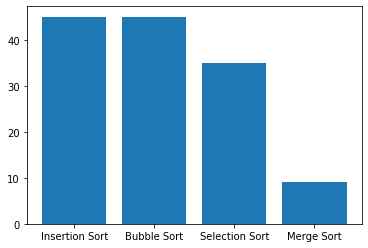

In [68]:
#import necessary libraries
from matplotlib import pyplot as plt
import timeit
#sorting algorithms imported from previous work

def insertion_sort(A):
    #for each function, in order to time, we will take the initial time at which the function starts, and the time at which it stops. Subtracting the two will give us total time elapsed
    start = timeit.default_timer()
    count = 0
    for j in range(1, len(A)):
        key = A[j]
        i= j-1
        while i >= 0 and A[i]>key:
            A[i+1] = A[i]
            i -= 1
            count += 1
        A[i+1] = key
    stop = timeit.default_timer()
    elapsed = stop - start
    return count,  elapsed
def bubble_sort(A):
    start = timeit.default_timer()
    count = 0
    for i in range(-1, len(A)):
        for j in range(len(A)-1, i + 1, -1):
            if A[j] < A[j-1]:
                count += 1
                A[j], A[j-1] = A[j-1], A[j]
    stop = timeit.default_timer()
    elapsed = stop - start
    return count,  elapsed
def selection_sort(A):
    start = timeit.default_timer()
    count = 0
    n = len(A) 
    for i in range(0,n):
        count += 1
        minidx = i
        for j in range(i, n):
            if A[j]<A[minidx]:
                minidx=j
                count += 1
        A[i], A[minidx] = A[minidx], A[i]
    stop = timeit.default_timer()
    elapsed = stop - start
    return count,  elapsed

def merge_sort(A,p,r,counter):
    
    #keep splitting until each subarray is length 1
    if p < r:
        
        #q is midway (floor) between p and r, the endpoints of array
        q = (p+r)//2
        
        #add 1 to couunter list
        counter.append(1)
        
        #call function again on "left" array, splitting into two again
        merge_sort(A,p,q, counter)
        
        #call function again on "right" array, splitting into two again
        merge_sort(A,q+1,r, counter)
        
        #use merge function
        merge(A,p,q,r)
    return(A,counter)
def step_counter(a):
    start = timeit.default_timer()
    counter = []
    sorted_list, count_total = merge_sort(a, 0, len(a)-1, counter[:])
    
    #each step will append 1 to counter list. Add sum of that entire list for total count
    stop = timeit.default_timer()
    elapsed = stop - start
    return sum(count_total),  elapsed

#each function returns total number of steps and then time elapsed respectively
insertion_count,insertion_time = insertion_sort([10,9,8,7,6,5,4,3,2,1])
bubble_count,bubble_time = bubble_sort([10,9,8,7,6,5,4,3,2,1])
selection_count, selection_time = selection_sort([10,9,8,7,6,5,4,3,2,1])
merge_count, merge_time = step_counter([10,9,8,7,6,5,4,3,2,1])

#create axes for plt plot
counts = [insertion_count, bubble_count, selection_count, merge_count]
times = [insertion_time, bubble_time, selection_time, merge_time]
sorts = ['Insertion Sort', 'Bubble Sort', 'Selection Sort', 'Merge Sort']

#plot steps vs sorting algorithm
plt.bar(sorts,counts)

plt.show()

In [ ]:
#In the case of steps vs algorithms, it seems very clear that merge sort performs the best. This is because merge sort's divide and conquer strategy makes it such that the total number of comparisons we draw will be drastically lower. We will never compare each value to all the other values every time, instead we sort them locally, then combine by sorting again and so on.

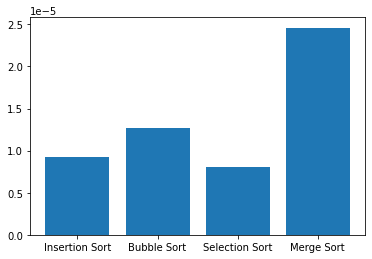

In [67]:
#plot time elapsed vs sorting algorithm
plt.bar(sorts, times)
plt.show()

In [ ]:
#in this case, it appears that merge sort is actually the slowest. This is likely due to the methodology of the step counter itself being rather inefficient rather than any fault of the algorithm itself. Another possibility is that the work of splitting and merging lists is more computationally expensive than what's required in other algorithms. As such, despite lower steps, more time is required. However, as our lists scale in size to much greater values, we should begin the see the other algorithms becoming exponentially more expensive while not so much for merge sort, outperforming the others